In [1]:
# !pip install git+https://github.com/altair-viz/altair_data_server.git

In [1]:
import hkvfewspy
import hkvsobekpy
import pandas as pd
import altair as alt
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
hkvsobekpy.__version__, hkvfewspy.__version__

('1.3.5', '0.6.2')

In [3]:
def waterstandstatistiek(df, location, parameter, value_column):
    df = df[[value_column]].astype(float)
    df.columns = [(location, parameter)]
    df.columns = pd.MultiIndex.from_tuples(df.columns, names=['location','parameter'])

    ws_stats = hkvsobekpy.waterlevelstat.AfleidingParameters(
        df_enkel = df, 
        N = len(df.index.year.unique()), 
        vensterArray = [0, 10], 
        GumbelT = [10, 25, 50, 100],
        TOI = 10,  
        startMMdd = (5, 15),
        endMMdd = (10, 15),
        jaarmax_as = 'date', 
        Ggi = 0.44, 
        GgN = 0.12
    )    
    return ws_stats

In [4]:
# set Pi client
pi = hkvfewspy.Pi()
pi.setClient(wsdl='https://webviewer.hkvfewsscheldestromen.nl/FewsPiService/fewspiservice?wsdl')

In [5]:
# get available filter Ids
filters = pi.getFilters()
filters

,HKV_WV_1,HKV_WV_3,HKV_WV_5,HKV_WV_6,HKV_WV_7,HKV_WV_8,HKV_WV_27,HKV_WV_38,HKV_WV_96,HKV_WV_103,HKV_WV_104,HKV_WV
description,,,,,,,,,,,,
id,HKV_WV_1,HKV_WV_3,HKV_WV_5,HKV_WV_6,HKV_WV_7,HKV_WV_8,HKV_WV_27,HKV_WV_38,HKV_WV_96,HKV_WV_103,HKV_WV_104,HKV_WV
name,wnshdb1,wnshdb3,wnshdb5,wnshdb6,wnshdb7,wnshdb8,wnshdb27,wnshdb38,wnshdb96,wnshdb103,wnshdb104,HKV WebViewer


In [6]:
# get available locatins
locations = pi.getLocations()
locations

,VOV9345,VOV9346,VOV32379,KGM8,KGM44,KGM34,KGM54,KGM12,KGM39,KGM100,...,MPN4904,MPN4905,MPN4906,MPN4909,MPN4907,MPN4913,MPN4912,MPN4911,MPN4910,MPN4914
geoDatum,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,...,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel,Rijks Driehoekstelsel
lat,51.4016519479478,51.48123119476028,51.27317529478825,51.65463775239045,51.563714349508196,51.507909256439255,51.38599635618589,51.64885045386372,51.545244272349386,51.572925598764755,...,51.46058131867781,51.46058979422694,51.49240556082831,51.47775839475506,51.4777314717713,51.53571173699996,51.50091659992924,51.51109798969467,51.51919839664145,51.52437906490621
locationId,VOV9345,VOV9346,VOV32379,KGM8,KGM44,KGM34,KGM54,KGM12,KGM39,KGM100,...,MPN4904,MPN4905,MPN4906,MPN4909,MPN4907,MPN4913,MPN4912,MPN4911,MPN4910,MPN4914
lon,4.24145342494035,3.600930263564612,3.828357777461734,3.8926374553143304,3.695183428677083,3.6320496407365863,3.81340231220656,3.9340894526840593,3.6738729000015087,4.12112841482906,...,3.582622035361844,3.582588741303828,3.8044723070492132,3.7795308606650715,3.7795473605725003,3.754159303178653,3.7761213048479436,3.7515599325678415,3.7521935613269313,3.768046217784559
shortName,"VOV9345 - Krooshekreiniger Paviljoenpolder, Bath","VOV9346 - Krooshekreiniger Stromenwijk, Middel...","VOV32379 - Krooshekreiniger Westkade, Sluiskil",KGM8 - Gemaal Boerenweg,KGM44 - Gemaal Jacoba,KGM34 - Gemaal Veerse Watergang,KGM54 - Gemaal 't Fort,KGM12 - Gemaal 't Sas,KGM39 - Gemaal Aalvanger,KGM100 - Gemaal Abr. Groenewegeweg,...,"MPN4904 - Stuw Sloeweg, instroomzijde","MPN4905 - Stuw Sloeweg, uitstroomzijde","MPN4906 - Stuw Nieuwe Rijksweg, ÔÇÿs-Heer Aren...","MPN4909 - Stuw Sloeweg, Oude Kraayertsedijk, '...","MPN4907 - Stuw Sloeweg, Oude Kraayertsedijk, '...","MPN4913 - Stuw Egbert Petruspolderweg, Wolphaa...","MPN4912 - Stuw Kromme Weide, 's-Heer Arendskerke","MPN4911 - Stuw Pietweg, Calandpolder, Wolphaar...","MPN4910 - Stuw Pietweg, Wolphaartsdijk","MPN4914 - Stuw Westerlandpolder, Wolphaartsdij..."
x,75273.34,30924.61,46225.36,51580.44,37683.75,33157.37,45452.64,54435.68,36158.04,67232.1,...,29596.21,29593.92,45088.12,43320.32,43321.4,41702.53,43140.45,41460.74,41524.94,42637.85
y,379793.38,389540.88,366035.6,408373.84,398559.33,392455.74,378607.38,407672.0,396539.43,398984.3,...,387275.37,387276.37,390457.05,388865.72,388862.7,395351.19,391446.9,392617.39,393517.43,394069.12


In [7]:
# get parameters
parameters = pi.getParameters()
parameters

,WNSHDB1,WNSHDB3,WNSHDB5,WNSHDB6,WNSHDB7,WNSHDB8,WNSHDB27,WNSHDB38,WNSHDB96
displayUnit,mNAP,mNAP,-,-,-,-,mS/cm,mNAP,-
id,WNSHDB1,WNSHDB3,WNSHDB5,WNSHDB6,WNSHDB7,WNSHDB8,WNSHDB27,WNSHDB38,WNSHDB96
name,waterstand instroom,waterstand uitstroom,bedrijf pomp1,bedrijf pomp2,bedrijf pomp3,bedrijf pomp4,geleidendheid,waterstand peilschaal,bedrijf pomp5
parameterType,instantaneous,instantaneous,instantaneous,instantaneous,instantaneous,instantaneous,instantaneous,instantaneous,instantaneous
unit,mNAP,mNAP,-,-,-,-,mS/cm,mNAP,-
usesDatum,false,false,false,false,false,false,false,false,false


In [8]:
# initiate query object
query = pi.setQueryParameters()

In [11]:
# define query parameters
query.parameterIds([parameters.Q_day.id, parameters.H_day.id])
query.locationIds([locations.MELKA.locationId, locations.AWASH.locationId])
query.startTime(pd.datetime(1901,1,1))
query.endTime(pd.datetime(1988,12,31))

In [12]:
# request timeseries from FEWS given the query parameters
timeseries = pi.getTimeSeries(queryParameters=query)
timeseries.head(10)

,moduleInstanceId,qualifierId,parameterId,units,locationId,stationName,flag,value
date,,,,,,,,
1901-01-01 00:00:00+00:00,PostProH,,H.day,m,AWASH,AWASH,8,-999
1901-01-01 00:00:00+00:00,PostProH,,H.day,m,MELKA,MELKA,8,-999
1901-01-01 00:00:00+00:00,PostProQ,,Q.day,m3/s,AWASH,AWASH,8,-999
1901-01-01 00:00:00+00:00,PostProQ,,Q.day,m3/s,MELKA,MELKA,8,-999
1901-01-02 00:00:00+00:00,PostProH,,H.day,m,AWASH,AWASH,0,9.31
1901-01-02 00:00:00+00:00,PostProH,,H.day,m,MELKA,MELKA,0,4.28
1901-01-02 00:00:00+00:00,PostProQ,,Q.day,m3/s,AWASH,AWASH,0,2035
1901-01-02 00:00:00+00:00,PostProQ,,Q.day,m3/s,MELKA,MELKA,0,1558.84
1901-01-03 00:00:00+00:00,PostProH,,H.day,m,AWASH,AWASH,0,9.65


In [13]:
# mask nodata values using the flag value
# docs: https://publicwiki.deltares.nl/display/FEWSDOC/D+Time+Series+Flags
timeseries.value.mask(timeseries.flag == 8, inplace=True)
timeseries.head()

,moduleInstanceId,qualifierId,parameterId,units,locationId,stationName,flag,value
date,,,,,,,,
1901-01-01 00:00:00+00:00,PostProH,,H.day,m,AWASH,AWASH,8,NaN
1901-01-01 00:00:00+00:00,PostProH,,H.day,m,MELKA,MELKA,8,NaN
1901-01-01 00:00:00+00:00,PostProQ,,Q.day,m3/s,AWASH,AWASH,8,NaN
1901-01-01 00:00:00+00:00,PostProQ,,Q.day,m3/s,MELKA,MELKA,8,NaN
1901-01-02 00:00:00+00:00,PostProH,,H.day,m,AWASH,AWASH,0,9.31


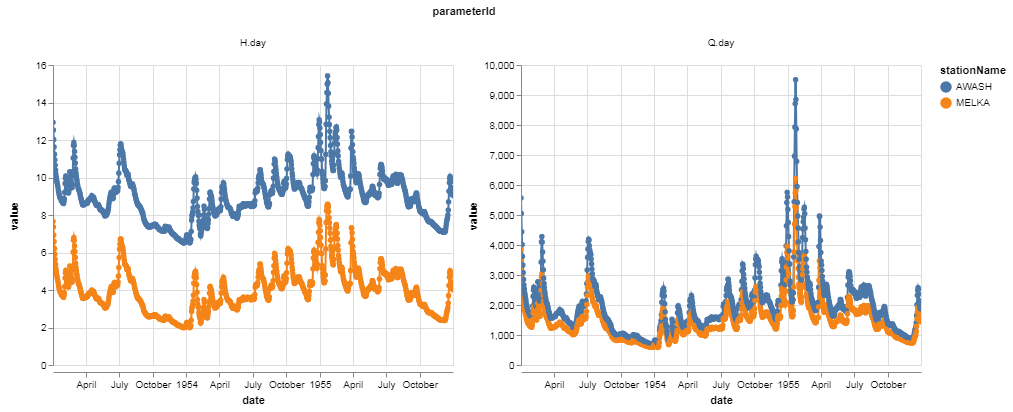

In [14]:
# make an interactive line chart for the year 1953-1955
line_chart = alt.Chart(timeseries['1953':'1955'].reset_index()).mark_line(point=True).encode(
    x='date',
    y='value',
    color='stationName',
    tooltip = ['value', 'stationName', alt.Tooltip('date:T', format = '%Y-%m-%d')]
).facet(
    column='parameterId',
).resolve_scale(
    y='independent'
).interactive(bind_y=False)

line_chart

In [15]:
line_chart.save('Q-H_stations.html')

In [16]:
location_a = 'AWASH'
location_m = 'MELKA'
parameter = 'H.day'
value_column = 'value'

h_awash = timeseries[(timeseries.parameterId == parameter) & (timeseries.locationId == location_a)]
h_melka = timeseries[(timeseries.parameterId == parameter) & (timeseries.locationId == location_m)]

In [17]:
# compute values regarding waterlevel statitistics
awash_ws_stats = waterstandstatistiek(h_awash, location_a, parameter, value_column)
melka_ws_stats = waterstandstatistiek(h_melka, location_m, parameter, value_column)

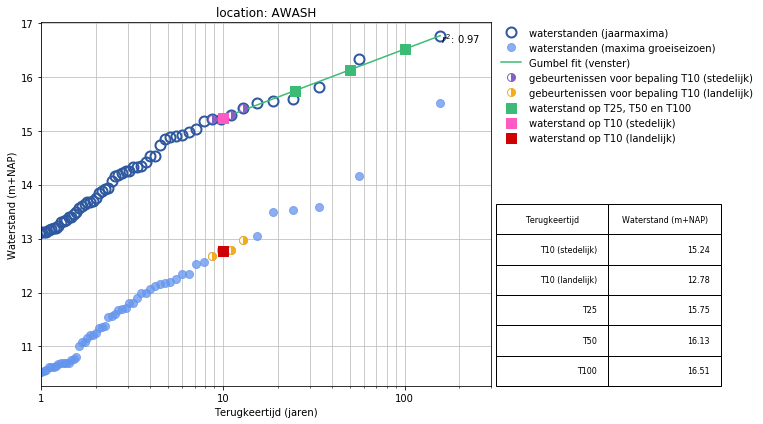

In [18]:
hkvsobekpy.waterlevelstat.PlotFiguur(awash_ws_stats)

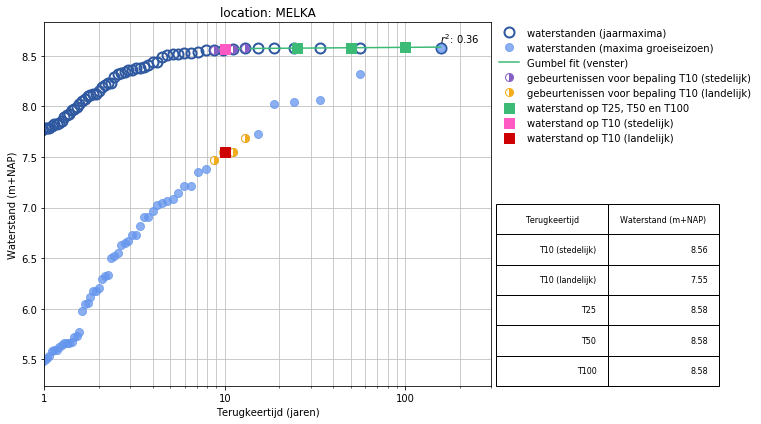

In [19]:
hkvsobekpy.waterlevelstat.PlotFiguur(melka_ws_stats)